In [1]:
#%config InlineBackend.figure_formats = ['svg']

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

import matplotlib.pyplot as plt
import numpy as np

#. plt.style.use('dark_background')


In [2]:
X, y = make_classification(n_samples=10000, n_features=20, n_informative=8, n_redundant=4, 
                                     n_repeated=3, n_classes=2, n_clusters_per_class=2, weights=(0.9,), 
                                     flip_y=0.06, random_state=4)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

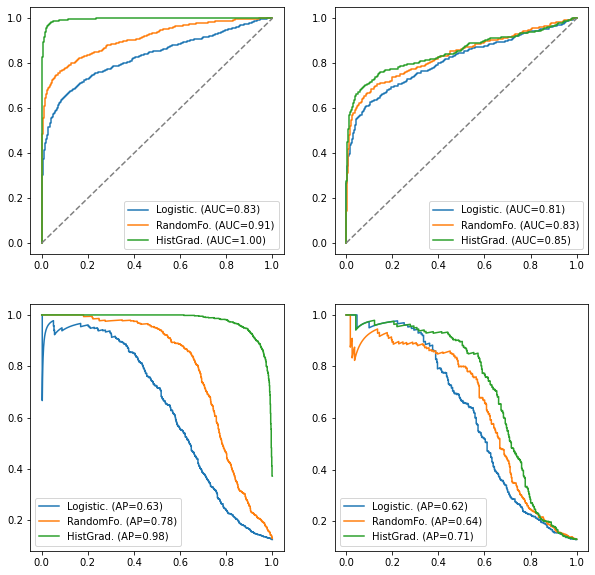

In [4]:
models = [LogisticRegression(),
          RandomForestClassifier(max_depth=6), 
         HistGradientBoostingClassifier(max_depth=6)
         ]

fig, ax = plt.subplots(figsize=(10,10), ncols=2, nrows=2)
ax = ax.flatten()

for i, clf in enumerate(models):
    
    name = type(clf).__name__
    name = name[:min(8, len(name))]+'.'
    
    clf.fit(X_train, y_train)
    
    y_probs_train = clf.predict_proba(X_train)[:,1]
    y_probs_test = clf.predict_proba(X_test)[:,1]

    train_auc = roc_auc_score(y_train, y_probs_train)
    test_auc = roc_auc_score(y_test, y_probs_test)
    
    train_ap = average_precision_score(y_train, y_probs_train)
    test_ap = average_precision_score(y_test, y_probs_test)
    
    # ROC curve 
    fpr, tpr, _ = roc_curve(y_train, y_probs_train)
    ax[0].plot(fpr, tpr, label=name + " (AUC={0:.2f})".format(train_auc))
    
    fpr, tpr, _ = roc_curve(y_test, y_probs_test)
    ax[1].plot(fpr, tpr, label=name + " (AUC={0:.2f})".format(test_auc))
    
    # PR curve
    prec, rec, _ = precision_recall_curve(y_train, y_probs_train)
    ax[2].plot(rec, prec, label=name + " (AP={0:.2f})".format(train_ap))
    
    prec, rec, _ = precision_recall_curve(y_test, y_probs_test)
    ax[3].plot(rec, prec, label=name + " (AP={0:.2f})".format(test_ap))
    
    
ax[0].plot([0,1], linestyle='--', color='gray')
ax[1].plot([0,1], linestyle='--', color='gray')

for i, axx in enumerate(ax):
    if i < 2:
        axx.legend(loc='lower right')

    elif i >= 2:
        axx.legend(loc='lower left')


plt.show()

In [5]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)
    
y_probs_train = clf.predict_proba(X_train)[:,1]
y_probs_test = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresh = roc_curve(y_test, y_probs_test)

In [6]:
def complete_plot_roc(y_true, y_probs, ax, threshold_step=0.1):
    
    """
    Run full ROC diagnostic
    """
    
    from sklearn.metrics import roc_curve, roc_auc_score
    from matplotlib.cm import viridis as mycolormap
    
    fpr, tpr, thresh = roc_curve(y_true, y_probs)
    
    # x axis, y axis
    x = fpr
    y = tpr

    auc = roc_auc_score(y_true, y_probs)

    # color
    c = thresh
    c[0] = c[0]-1
    c = (c - c.min())/(c.max() - c.min())

    base = 1.0 - threshold_step
    for i in range(len(x)):
        ax.plot(x[i:i+2], y[i:i+2], c=mycolormap(c[i]))

        if thresh[i] <= base:
            ax.scatter(x[i], y[i], color=mycolormap(c[i]))
            ax.annotate("  {0:.1f}".format(thresh[i]), (x[i]*1.03, y[i]*0.96), fontsize=8)
            base -= threshold_step
    
    ax.annotate("AUC = {0:.2f}".format(auc), (0.77, 0.01), fontsize=8,
               bbox=dict(facecolor='none', edgecolor='black', pad=5.0))
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")
    
    return

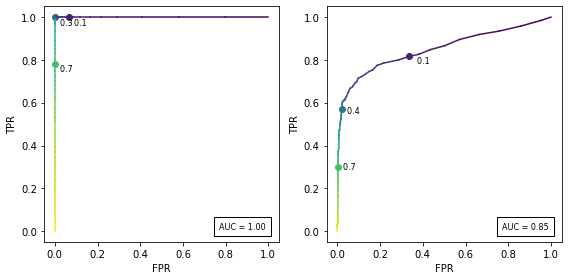

In [10]:
fig, ax = plt.subplots(figsize=(8,4), ncols=2)
complete_plot_roc(y_train, y_probs_train, ax[0], threshold_step=0.3)
complete_plot_roc(y_test, y_probs_test, ax[1], threshold_step=0.3)
#ax[].axis('scaled')
plt.tight_layout()
plt.savefig("AUC.png")
plt.show()

In [8]:
def complete_plot_pr(y_true, y_probs, ax, threshold_step=0.1):
    
    """
    Run full Precision-Recall diagnostic
    """
    
    from sklearn.metrics import precision_recall_curve, average_precision_score
    from matplotlib.cm import viridis as mycolormap
    
    prec, rec, thresh = precision_recall_curve(y_true, y_probs)
    
    # x axis, y axis
    x = rec
    y = prec

    ap = average_precision_score(y_true, y_probs)

    # color
    c = thresh
    #c[0] = c[0]-1
    #c = (c - c.min())/(c.max() - c.min())

    base = threshold_step
    for i in range(len(x)-1):
        ax.plot(x[i:i+2], y[i:i+2], c=mycolormap(c[i]))

        if thresh[i] <= base:
            ax.scatter(x[i], y[i], color=mycolormap(c[i]))
            ax.annotate("  {0:.1f}".format(thresh[i]), (x[i]*1.03, y[i]*0.96), fontsize=8)
            base += threshold_step
    
    ax.annotate("AP = {0:.2f}".format(ap), (0.77, 0.01), fontsize=8,
               bbox=dict(facecolor='none', edgecolor='black', pad=5.0))
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    
    return

<ipython-input-9-77cb8b7a5213>:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


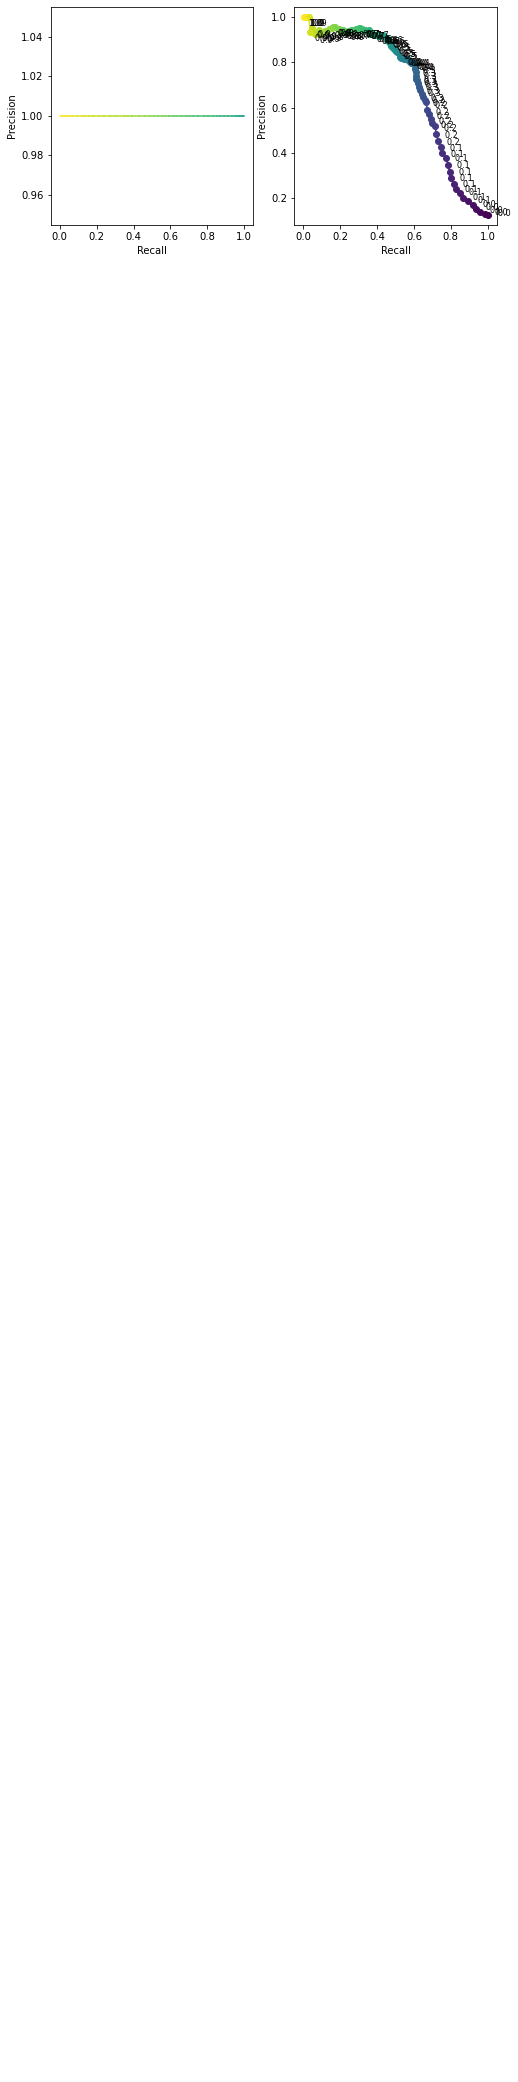

In [9]:
fig, ax = plt.subplots(figsize=(8,4), ncols=2)
complete_plot_pr(y_train, y_probs_train, ax[0], threshold_step=0.3)
complete_plot_pr(y_test, y_probs_test, ax[1], threshold_step=0.3)
#ax[].axis('scaled')
plt.tight_layout()
plt.show()